# Quantitative Measure of Bleed

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import librosa as lb
import soundfile as sf
from pydub import AudioSegment
import math

In [2]:
path = "/home/rajesh/Desktop/Datasets/Saraga3stem/train/Aaniraimekkani/"
files = os.listdir(path)
files

['vocals.wav',
 'violin.wav',
 'mixture.wav',
 'mridangam.wav',
 'accompaniment.wav']

In [3]:
vocal, vfs = sf.read(path+'vocals.wav')
violin, vifs = sf.read(path+'violin.wav')
mridangam, mfs = sf.read(path+'mridangam.wav')

In [4]:
vfs, vifs, mfs, len(vocal), len(violin), len(mridangam)

(44100, 44100, 44100, 12661103, 12661103, 12661103)

In [5]:
vocal_others = AudioSegment.from_file(path+'violin.wav').overlay(AudioSegment.from_file(path+'mridangam.wav'))
mridangam_others = AudioSegment.from_file(path+'violin.wav').overlay(AudioSegment.from_file(path+'vocals.wav'))
violin_others = AudioSegment.from_file(path+'vocals.wav').overlay(AudioSegment.from_file(path+'mridangam.wav'))

In [6]:
vocal_others.export(out_f = "/home/rajesh/Desktop/vocal_others.wav", format = "wav")
mridangam_others.export(out_f = "/home/rajesh/Desktop/mridangam_others.wav", format = "wav")
violin_others.export(out_f = "/home/rajesh/Desktop/violin_others.wav", format = "wav")

<_io.BufferedRandom name='/home/rajesh/Desktop/violin_others.wav'>

In [7]:
vocal_o, vfs = sf.read("/home/rajesh/Desktop/vocal_others.wav")
violin_o, vifs = sf.read("/home/rajesh/Desktop/violin_others.wav")
mridangam_o, mfs = sf.read("/home/rajesh/Desktop/mridangam_others.wav")

In [8]:
vfs, vifs, mfs

(44100, 44100, 44100)

In [9]:
len(mridangam_o)

12661110

In [16]:
import pandas as pd
import seaborn as sns

In [30]:
v = pd.DataFrame([vocal[:12661], vocal_o[:12661]]).T
v.columns=['Vocals','Others']

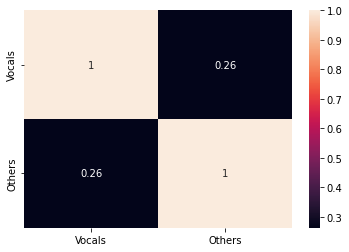

In [32]:
ax = sns.heatmap(v.corr(), annot=True)

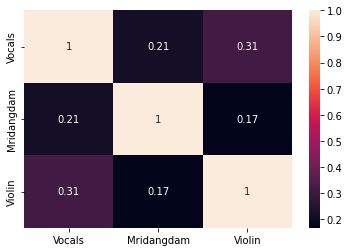

In [33]:
al = pd.DataFrame([vocal[:12661], mridangam[:12661], violin[:12661]]).T
al.columns=['Vocals','Mridangdam', 'Violin']
ax = sns.heatmap(al.corr(), annot=True)